In [1]:
import numpy as np

np.random.seed(18)
sqft = np.random.randint(650, 2000, 2000).astype(np.int64)
price = sqft * 2 + np.random.normal(0, 300, 2000)
w = 4
b = 3

pred_price = b + w*sqft
print (pred_price) #pre_price is the predicted price of the house price.

[7891 3703 7179 ... 5423 6183 3859]


In [2]:
p0 = np.array(price)
p1 = np.array(pred_price)
gap = p0 - p1
print(gap)


[-3432.70517144 -1538.02947827 -3702.63508217 ... -2708.43732401
 -3350.52156287 -2043.66312071]


In [3]:
from sklearn.metrics import mean_squared_error
print ("MSE is:", mean_squared_error(p0, p1)) #Calculation of the MSE

MSE is: 7580917.058919065


In [4]:
from sklearn.metrics import median_absolute_error
print("MAE is:", median_absolute_error(p0, p1))

MAE is: 2626.0816803354774


In [7]:
#write in the generated data and store them in csv file for furtehr analysis

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

import csv


sqft = np.random.randint(650, 2000, 2000).astype(np.int64)
price = sqft * 2 + np.random.normal(0, 300, 2000)

csvfile = open('the_input_data.csv', 'w')
writer = csv.writer(csvfile)
writer.writerow(['sqft','price'])
data = list(zip(sqft, price))
writer.writerows(data)
csvfile.close()


In [11]:
from pandas import read_csv
data = read_csv('file:///Users/llately/Desktop/上课/2019fall/6574/HW/hw2/the_input_data.csv', encoding = 'GBK')
# to test the homework you can download the csv file that named"input_file" that I will attach to the blackboard, you can change the address when running thr code

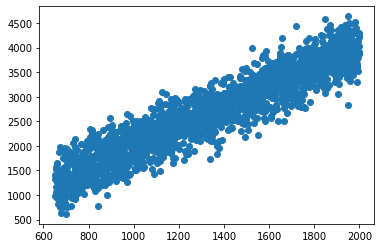

In [12]:
#draw plot figure:
plt.scatter(data.sqft, data.price)

In [13]:
data.corr()

,sqft,price
sqft,1.000000,0.934937
price,0.934937,1.000000


In [15]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lrModel = LinearRegression()
x = data[['sqft']]
y = data[['price']]
#train the model
lrModel.fit(x,y)
lrModel.score(x,y)#test reliability
#0.86 is a high score, suggesting that we can use this model to predict the price

0.8741072484044861

In [16]:
#to look up to the intercept：
import numpy as np
b = lrModel.intercept_[0] 
weight = lrModel.coef_[0][0]
b + weight*np.array([200][0]) #when the house is 200 sqft, tell the parameters

377.9217888250216

In [17]:
print (b)
print (weight)

-26.94279727800722
2.0243229305151442


In [ ]:
#by running the code above, it is easy to visualize the relationship between the house area and house price. 
#by calculating the reliability, the testing model is solid to measure the simulated house area and house price.